___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Linear Regression - Project Exercise

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [55]:
df = pd.read_csv('Ecommerce Customers.txt')
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


**Check the head of customers, and check out its info() and describe() methods.**

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [57]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [58]:
sns.set_palette("seismic")
sns.set_style('whitegrid')

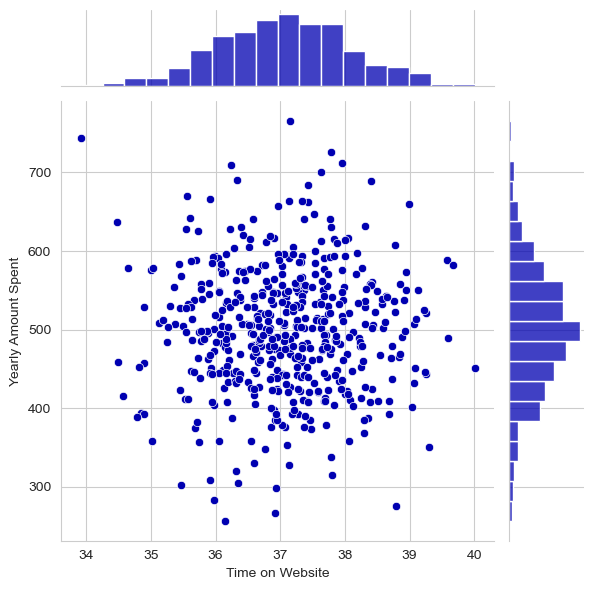

In [59]:
sns.jointplot(x = 'Time on Website' , y = 'Yearly Amount Spent' , data = df)

** Do the same but with the Time on App column instead. **

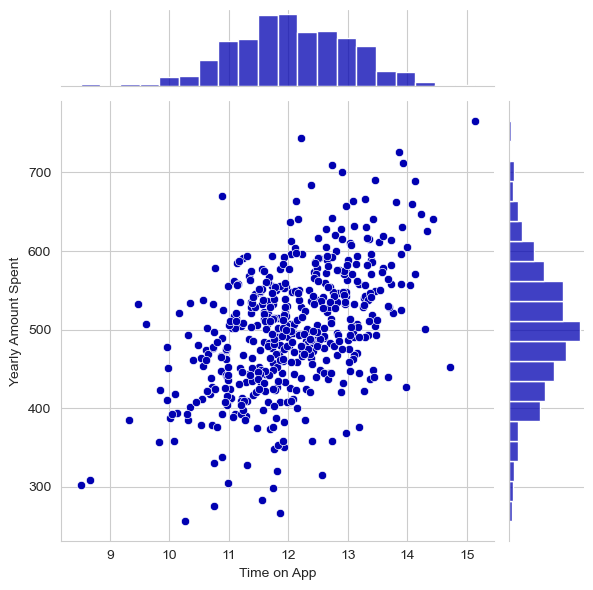

In [60]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)


** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

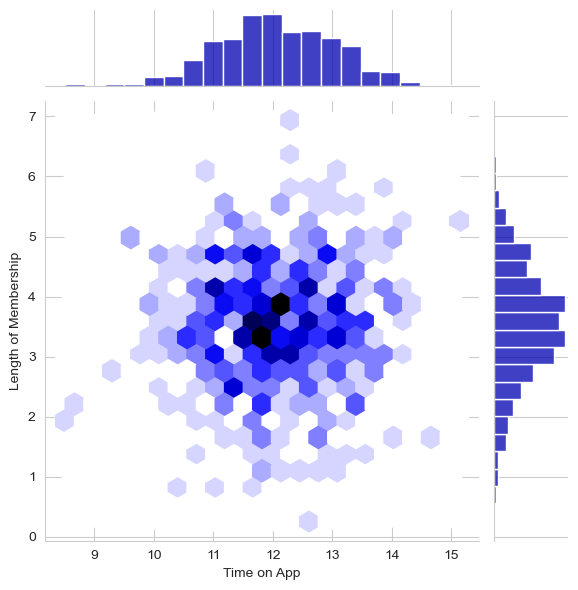

In [61]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=df)


**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

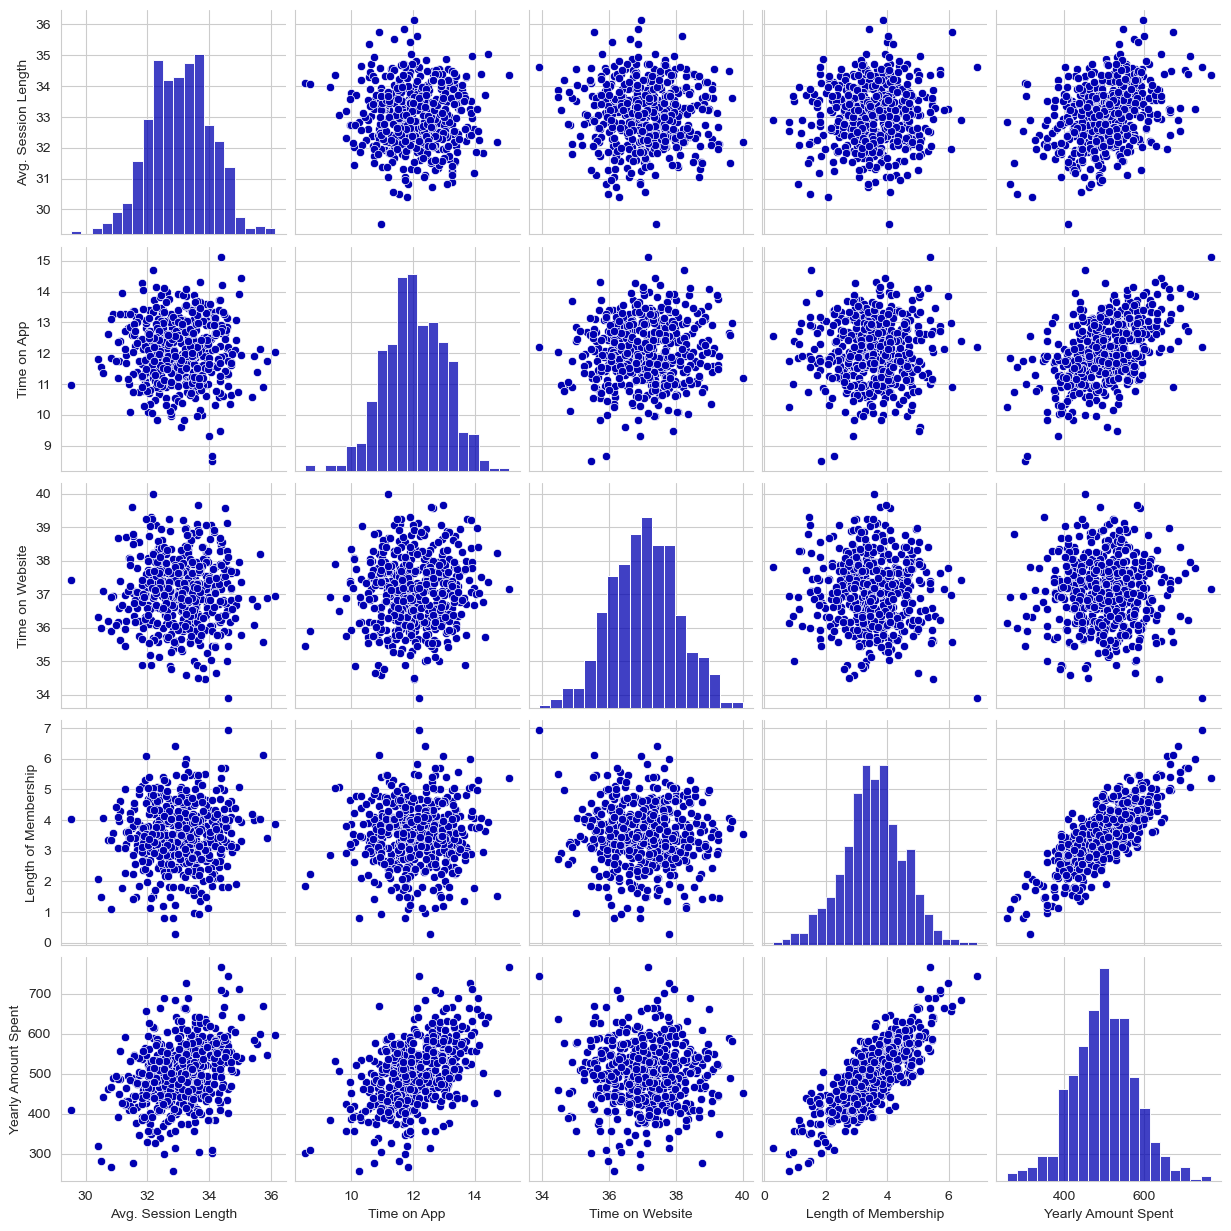

In [62]:
sns.pairplot(df)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [63]:
# Length of Membership

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

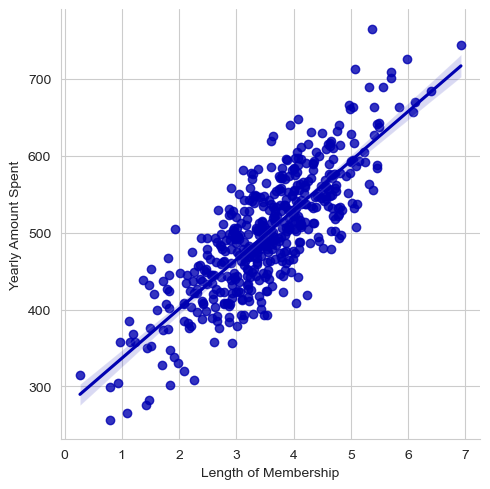

In [64]:
sns.lmplot(x = 'Length of Membership' , y = 'Yearly Amount Spent' , data =df)

C:\Users\noorr\AppData\Local\Temp\ipykernel_14528\2482631214.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


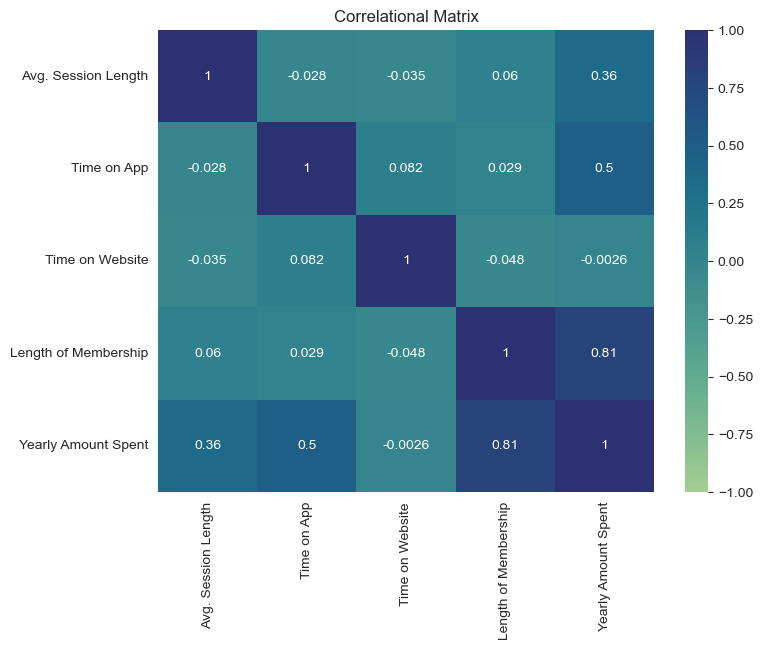

In [65]:
cor = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor, annot= True , cmap ='crest', vmin=-1, vmax=1 )
plt.title('Correlational Matrix')
plt.show()

In [66]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [70]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [67]:
df['Address'].nunique()

500

## Email doesn't necessarily contribute to the yearly amount spend and no pattern is detected in the addresses and as all the addresses are unique in this table, it will rarely be valuable in the regression model

In [71]:
df.drop(['Email','Address'], axis = 1 , inplace = True)

## Columns to encode

In [74]:
encd_columns = ['Avatar']

one_hot_data = pd.get_dummies(df['Avatar'])
one_hot_data.columns

Index(['AliceBlue', 'AntiqueWhite', 'Aqua', 'Aquamarine', 'Azure', 'Beige',
       'Bisque', 'Black', 'BlanchedAlmond', 'Blue',
       ...
       'Teal', 'Thistle', 'Tomato', 'Turquoise', 'Violet', 'Wheat', 'White',
       'WhiteSmoke', 'Yellow', 'YellowGreen'],
      dtype='object', length=138)

In [76]:
df.drop(['Avatar'], axis =1 , inplace = True)

In [77]:
final_data = pd.concat([one_hot_data,df], axis=1)

In [79]:
final_data.columns

Index(['AliceBlue', 'AntiqueWhite', 'Aqua', 'Aquamarine', 'Azure', 'Beige',
       'Bisque', 'Black', 'BlanchedAlmond', 'Blue',
       ...
       'Wheat', 'White', 'WhiteSmoke', 'Yellow', 'YellowGreen',
       'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object', length=143)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [80]:
final_data.columns

Index(['AliceBlue', 'AntiqueWhite', 'Aqua', 'Aquamarine', 'Azure', 'Beige',
       'Bisque', 'Black', 'BlanchedAlmond', 'Blue',
       ...
       'Wheat', 'White', 'WhiteSmoke', 'Yellow', 'YellowGreen',
       'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object', length=143)

In [83]:
X = final_data.iloc[:,:-1]
Y = final_data.iloc[:,-1]

In [84]:
X.columns

Index(['AliceBlue', 'AntiqueWhite', 'Aqua', 'Aquamarine', 'Azure', 'Beige',
       'Bisque', 'Black', 'BlanchedAlmond', 'Blue',
       ...
       'Violet', 'Wheat', 'White', 'WhiteSmoke', 'Yellow', 'YellowGreen',
       'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object', length=142)

In [85]:
Y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train , y_test = train_test_split(X , Y , test_size = 0.3, random_state = 101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [88]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [89]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [90]:
lm.fit(X_train , y_train)

LinearRegression()

**Print out the coefficients of the model**

In [91]:
print('Coefficients: \n' , lm.coef_)

Coefficients: 
 [ 1.48703821e+07  1.48703786e+07  1.48703686e+07  1.48703700e+07
  1.48703688e+07  1.48703710e+07  1.48703715e+07  1.48703748e+07
  1.48703749e+07  1.48703736e+07  1.48703752e+07  1.48703706e+07
  1.48703714e+07  1.48703637e+07  1.48703698e+07  1.48703778e+07
 -1.56221966e+13  1.48703734e+07  1.48703771e+07  1.48703771e+07
  1.48703697e+07  1.48703837e+07  1.48703784e+07  1.48703737e+07
  1.48703750e+07  1.48703847e+07  1.48703769e+07  1.48703804e+07
  1.48703704e+07  1.48703653e+07  1.48703669e+07  1.48703782e+07
  1.48703767e+07  1.48703777e+07  1.48703730e+07  1.48703713e+07
  1.48703715e+07  1.48703710e+07  1.48703774e+07  1.48703777e+07
  1.48703829e+07  1.48703743e+07  1.48703996e+07  1.48703709e+07
  1.48703881e+07 -3.15480255e-04  1.48703852e+07  1.48703748e+07
  1.48703559e+07  1.48703743e+07  1.48703770e+07  1.48703682e+07
  1.48703799e+07  1.48703714e+07  1.48703824e+07  1.48703596e+07
  1.48703792e+07  1.48703678e+07  1.48703698e+07  1.48703892e+07
  1.48703

In [94]:
coeff_ = pd.DataFrame(lm.coef_ , X.columns)
coeff_

,0
AliceBlue,1.487038e+07
AntiqueWhite,1.487038e+07
Aqua,1.487037e+07
Aquamarine,1.487037e+07
Azure,1.487037e+07
...,...
YellowGreen,1.487038e+07
Avg. Session Length,2.666551e+01
Time on App,3.891254e+01
Time on Website,3.256212e-01


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [96]:
pred = lm.predict(X_test)
pred

array([ 4.50410265e+02,  4.03416080e+02,  4.07643043e+02,  5.96118452e+02,
        5.99331418e+02,  5.47765376e+02,  5.82567527e+02,  7.27855047e+02,
        4.74855827e+02,  5.55230508e+02,  3.45630253e+02,  5.09915508e+02,
        5.56231899e+02,  4.07370103e+02,  7.60196613e+02,  5.40128834e+02,
        6.97246835e+02,  5.01578649e+02,  5.70325890e+02, -1.48698020e+07,
        3.90008775e+02, -1.48698201e+07,  4.57128952e+02,  4.78266421e+02,
        5.68548459e+02,  4.14285685e+02,  5.26475991e+02,  3.57342301e+02,
        5.37453710e+02,  4.43288128e+02,  6.02180808e+02, -3.81997361e+14,
        5.12993632e+02,  5.74083361e+02,  5.07110845e+02,  5.61843437e+02,
        4.44622024e+02,  4.33638994e+02,  4.05882196e+02,  4.60068461e+02,
        5.97238895e+02,  4.37316806e+02,  6.08397320e+02,  5.35747893e+02,
        5.17547908e+02,  5.17060897e+02,  5.69042701e+02,  5.55345723e+02,
        3.58153281e+02,  4.73196674e+02,  4.74080581e+02,  5.44563184e+02,
        2.51628461e+02,  

** Create a scatterplot of the real test values versus the predicted values. **

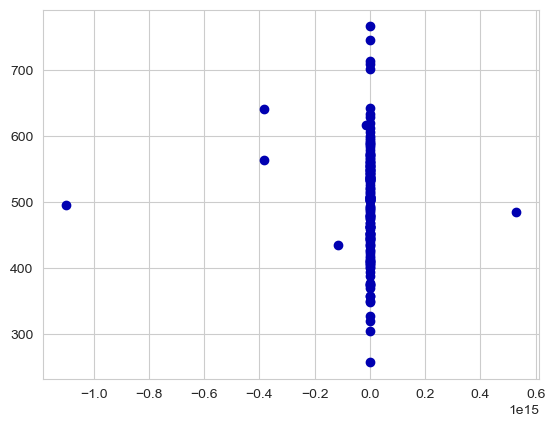

In [98]:
plt.scatter(pred , y_test)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [100]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 16845832201978.562
MSE: 1.2006036169922874e+28
RMSE: 109572059257471.62


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

C:\Users\noorr\AppData\Local\Temp\ipykernel_14528\3468824824.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - pred), bins =50)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

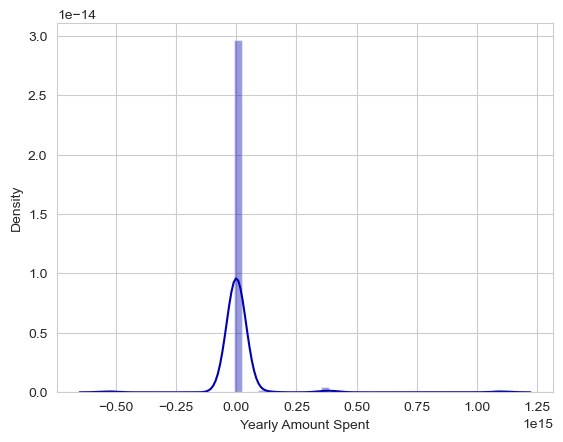

In [101]:
sns.distplot((y_test - pred), bins =50)

## Now the question is the avatar column disrupting rhe model?

In [102]:
model_without_avatar = LinearRegression()


In [105]:
X = df.drop(['Yearly Amount Spent'],axis = 1)
Y = df['Yearly Amount Spent']

In [107]:
X_train , X_test , y_train , y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

In [108]:
model_without_avatar.fit(X_train , y_train)

LinearRegression()

In [111]:
pred_noavatar = model_without_avatar.predict(X_test)


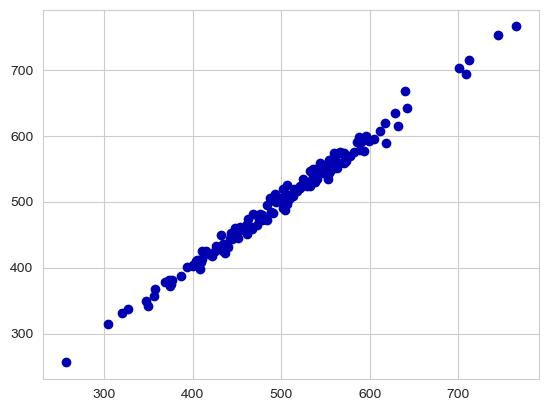

In [112]:
plt.scatter(y_test , pred_noavatar)

## Residuals

C:\Users\noorr\AppData\Local\Temp\ipykernel_14528\1598673030.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([pred_noavatar - y_test], bins = 50)


<Axes: ylabel='Density'>

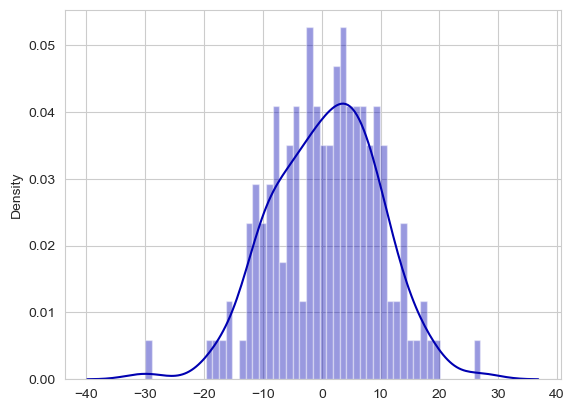

In [114]:
sns.distplot([pred_noavatar - y_test], bins = 50)

In [115]:
print('MSE:', metrics.mean_squared_error(y_test, pred_noavatar))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_noavatar)))

MSE: 79.81305165097444
RMSE: 8.933815066978633


## By dropping the avatar columns, we're seeing a significant positive change in predictions

** How can you interpret these coefficients? **

**Do you think the company should focus more on their mobile app or on their website?**


*Answer here*

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.